In [6]:
# Problem 1: KNN Classification from Scratch

import pandas as pd
import numpy as np


In [8]:
# Load the dataset (exact file name from Colab)
data = pd.read_csv("diabetes_.csv")

# Display first few rows
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Check data types and non-null counts
data.info()
# Check for missing values
data.isnull().sum()
# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Columns where zero indicates missing data
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with NaN
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Fill missing values with column mean
for col in cols_with_zero:
    data[col].fillna(data[col].mean(), inplace=True)

# Verify missing values
data.isnull().sum()


/tmp/ipython-input-826247167.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
# Separate features and target
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values


In [12]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [13]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [17]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [18]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [19]:
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100


In [20]:
# Make predictions
predictions = knn_predict(X_test, X_train, y_train, k=3)

# Compute accuracy
accuracy = compute_accuracy(y_test, predictions)

accuracy


np.float64(70.0)

In [21]:
#Problem 2
# Standard scaling function (from scratch)
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std


In [22]:
# Scale the feature matrix
X_scaled = standard_scale(X)


In [23]:
# Train-test split on scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [24]:
# KNN prediction on scaled data
predictions_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)

# Compute accuracy
accuracy_scaled = compute_accuracy(y_test_s, predictions_scaled)
accuracy_scaled


np.float64(67.82608695652173)

In [25]:
print("Accuracy (Unscaled Data):", accuracy)
print("Accuracy (Scaled Data):", accuracy_scaled)


Accuracy (Unscaled Data): 70.0
Accuracy (Scaled Data): 67.82608695652173


In [26]:
#Problem3
import time
import matplotlib.pyplot as plt


In [27]:
def experiment_k_values(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k)
        end_time = time.time()

        accuracy = compute_accuracy(y_test, predictions)

        accuracies.append(accuracy)
        times.append(end_time - start_time)

        print(f"k={k} | Accuracy={accuracy:.2f}% | Time={end_time - start_time:.4f}s")

    return accuracies, times


In [28]:
k_values = range(1, 16)

acc_unscaled, time_unscaled = experiment_k_values(
    X_train, X_test, y_train, y_test, k_values
)


k=1 | Accuracy=67.83% | Time=1.3631s
k=2 | Accuracy=70.43% | Time=1.3729s
k=3 | Accuracy=70.00% | Time=1.0792s
k=4 | Accuracy=70.87% | Time=0.7891s
k=5 | Accuracy=67.39% | Time=0.7859s
k=6 | Accuracy=68.70% | Time=0.7725s
k=7 | Accuracy=68.26% | Time=0.8023s
k=8 | Accuracy=69.13% | Time=0.7925s
k=9 | Accuracy=69.13% | Time=1.0659s
k=10 | Accuracy=70.87% | Time=0.7930s
k=11 | Accuracy=70.87% | Time=1.0623s
k=12 | Accuracy=71.30% | Time=0.7761s
k=13 | Accuracy=71.30% | Time=0.7857s
k=14 | Accuracy=72.17% | Time=0.7873s
k=15 | Accuracy=73.48% | Time=1.7095s


In [29]:
acc_scaled, time_scaled = experiment_k_values(
    X_train_s, X_test_s, y_train_s, y_test_s, k_values
)


k=1 | Accuracy=66.52% | Time=0.7880s
k=2 | Accuracy=68.70% | Time=0.8103s
k=3 | Accuracy=67.83% | Time=0.8510s
k=4 | Accuracy=70.87% | Time=0.9452s
k=5 | Accuracy=70.43% | Time=0.8023s
k=6 | Accuracy=69.13% | Time=0.7847s
k=7 | Accuracy=69.57% | Time=0.7992s
k=8 | Accuracy=71.74% | Time=0.7926s
k=9 | Accuracy=72.17% | Time=0.7957s
k=10 | Accuracy=73.04% | Time=0.7779s
k=11 | Accuracy=73.91% | Time=1.1234s
k=12 | Accuracy=73.04% | Time=1.3787s
k=13 | Accuracy=73.48% | Time=1.3855s
k=14 | Accuracy=73.04% | Time=1.0173s
k=15 | Accuracy=74.78% | Time=0.8038s


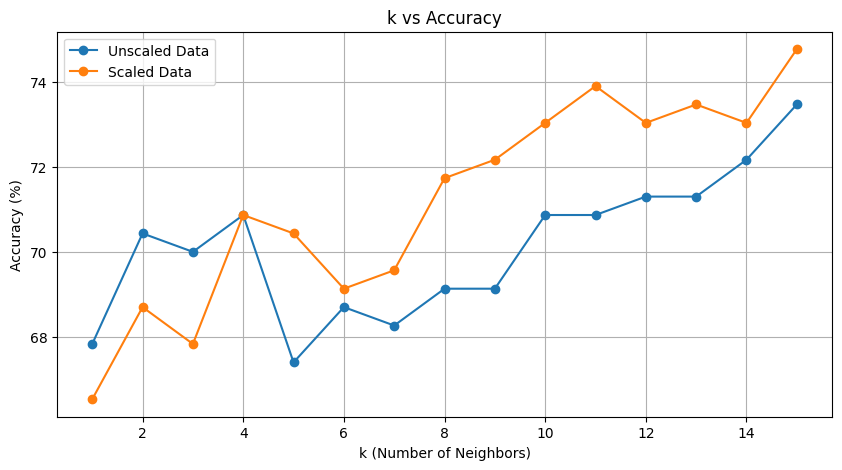

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, acc_unscaled, marker='o', label='Unscaled Data')
plt.plot(k_values, acc_scaled, marker='o', label='Scaled Data')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


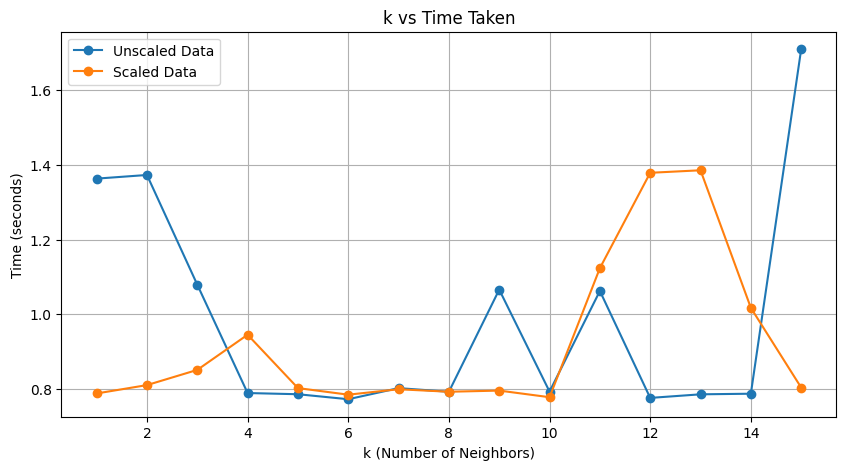

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, time_unscaled, marker='o', label='Unscaled Data')
plt.plot(k_values, time_scaled, marker='o', label='Scaled Data')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid(True)
plt.show()
